## Machine Learning for Public Policy - Mini-Project 1 1

Yuna Baek (12370259 / ybaek)

Jan 30, 2025

### 3. Preparing the Data

In [122]:
## import essential packages
import pandas as pd
import numpy as np
import scipy.linalg
import scipy.interpolate
from scipy.interpolate import BSpline
from scipy.interpolate import BSpline, splrep
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import SplineTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [43]:
# Loading datasets
path = "/Users/yunabaek/Desktop/1. Machine Learning/MP1"
acs_df = pd.read_csv(path+"/usa_00001.csv")
educ_cw = pd.read_csv(path+"/PPHA_30545_MP01-Crosswalk.csv")

(a) Education

In [44]:
# Merging crosswalk
acs_df = acs_df.merge(educ_cw, left_on='EDUCD', right_on='educd', how='left')

(b) Dummy Variables

In [ ]:
acs_df['hsdip'] = np.where(acs_df['educdc'] == 12, 1, 0)
acs_df['coldip'] = np.where(acs_df['educdc'] >= 16, 1, 0)
acs_df['white'] = np.where(acs_df['RACE'] == 1, 1, 0)
acs_df['black'] = np.where(acs_df['RACE'] == 2, 1, 0)
acs_df['hispanic'] = np.where(acs_df['HISPAN'].isin([0, 9]), 0, 1)
acs_df['married'] = np.where(acs_df['MARST'].isin([1, 2]), 1, 0)
acs_df['female'] = np.where(acs_df['SEX'] == 2, 1, 0)
acs_df['vet'] = np.where(acs_df['VETSTAT'] == 2, 1, 0)

(c) Interaction Terms - Create an interaction between each of the education dummy variables (hsdip and coldip) and the continuous measure of education (educdc).

In [47]:
acs_df['hsint'] = acs_df['hsdip']*acs_df['educdc']
acs_df['colint'] = acs_df['coldip']*acs_df['educdc']

(d) Created Variables

In [48]:
# i. Age squared
acs_df['agesq'] = acs_df['AGE']**2
# ii. The natural log of incwage.
acs_df = acs_df[acs_df['INCWAGE'] > 0]
acs_df['lnincwage'] = np.log(acs_df['INCWAGE'])

### 4. Data Analysis Questions

Compute descriptive(summary)statistics for the following variables:
year,incwage,lnincwage, educdc, female, age, age2, white, black, hispanic, married, nchild, vet, hsdip, coldip, and the interaction terms. In other words, compute sample means, standard deviations, etc.

In [ ]:
acs_df.columns = acs_df.columns.str.lower()
variables_list = [
    'year', 'incwage', 'lnincwage', 'educdc', 'female', 'age', 'agesq',
    'white', 'black', 'hispanic', 'married', 'nchild', 'vet', 'hsdip', 'coldip', 'hsint', 'colint'
]
display(acs_df[variables_list].describe())

,year,incwage,lnincwage,educdc,female,age,agesq,white,black,hispanic,married,nchild,vet,hsdip,coldip,hsint,colint
count,8627.0,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000,8627.000000
mean,2023.0,70624.331749,10.702499,14.301032,0.485221,41.592790,1906.799003,0.650748,0.083807,0.169468,0.542019,0.783586,0.040454,0.252579,0.413006,3.030949,7.017040
std,0.0,83130.215947,1.063267,3.074680,0.499810,13.298846,1120.142168,0.476761,0.277114,0.375186,0.498260,1.093632,0.197034,0.434517,0.492402,5.214201,8.424406
min,2023.0,60.000000,4.094345,0.000000,0.000000,18.000000,324.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,28000.000000,10.239960,12.000000,0.000000,30.000000,900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023.0,50000.000000,10.819778,14.000000,0.000000,41.000000,1681.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2023.0,84000.000000,11.338572,16.000000,1.000000,53.000000,2809.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,12.000000,16.000000
max,2023.0,770000.000000,13.554146,22.000000,1.000000,65.000000,4225.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,12.000000,22.000000


2. Scatter plot ln(incwage) and education (the continuous measure). Include a linear fit line. Be sure to label all axes and include an informative title.

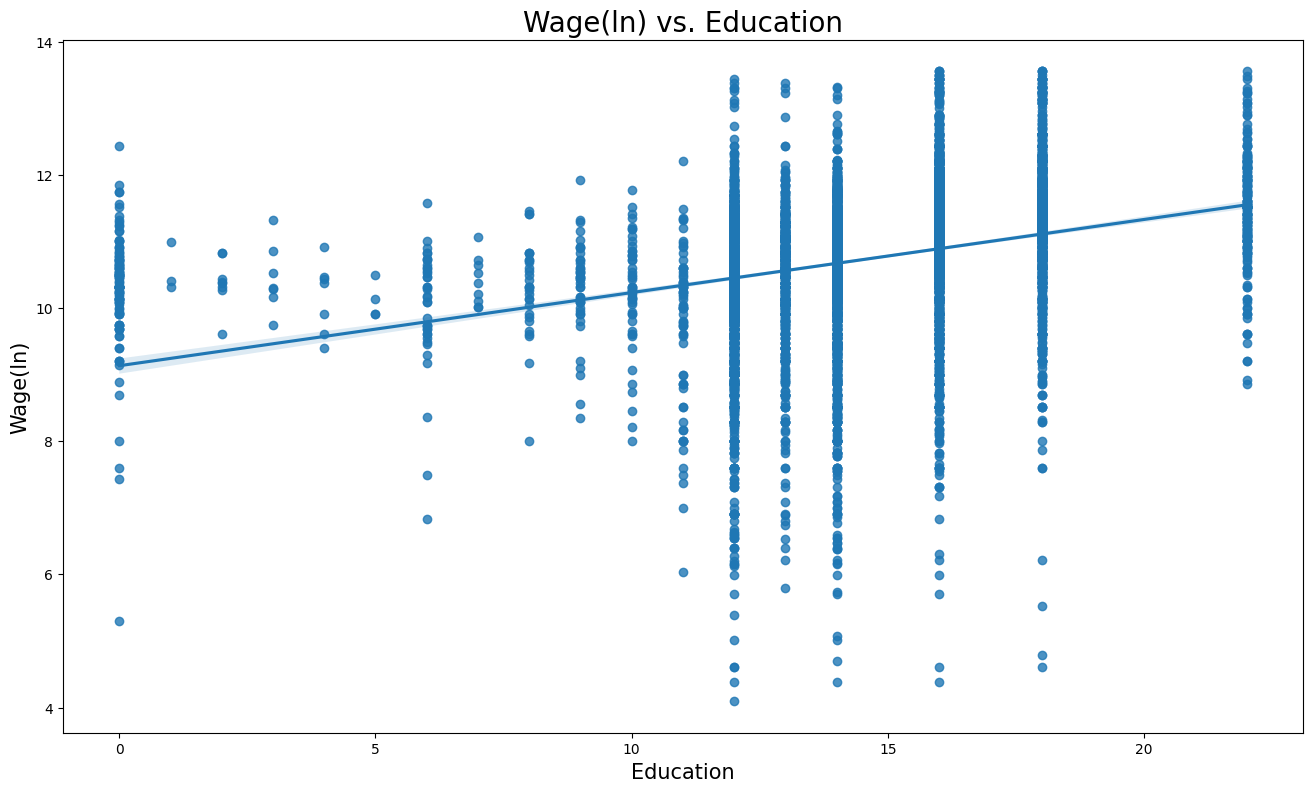

In [55]:
fig, ax = plt.subplots(figsize=(16, 9))

sns.regplot(x='educdc', y='lnincwage', data=acs_df, ax=ax)

# Adding informative labels
ax.set_xlabel("Education", fontsize=15)
ax.set_ylabel("Wage(ln)", fontsize=15)
ax.set_title('Wage(ln) vs. Education', fontsize=20)

# Display the plot
plt.show()

3. Estimating model

In [56]:
regression = smf.ols('lnincwage ~ educdc + female + age + agesq + white + black + hispanic + married + nchild + vet', data=acs_df).fit()
print(regression.summary())

                            OLS Regression Results                            
Dep. Variable:              lnincwage   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     340.8
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        00:11:45   Log-Likelihood:                -11332.
No. Observations:                8627   AIC:                         2.269e+04
Df Residuals:                    8616   BIC:                         2.276e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.2112      0.115     54.189      0.0

(a) What fraction of the variation in log wages does the model explain?

The model explains 28.34% of the variation in log wages.


(b) What is the return to an additional year of education? Is this statistically significant? Is it practically significant? Briefly explain.

An additional year of education results in an increase of 9.12% in wage. This is statistically significant at the 95% confidence level as the p-value is smaller than 0.05. An increase in 9.12% of wage is also practically significant.

(c) At what age does the model predict an individual will achieve the highest wage?

The age at which the highest wage will be achieved can be calculated using the quadratic formula. 

In [74]:
b1 = regression.params['age']
b2 = regression.params['agesq']
highest_age = -b1 / (2*b2)

print(f"The model predicts that the highest wage will be achieved at {highest_age:.2f}.")

The model predicts that the highest wage is achieved at 47.43.


(d) Does the model predict that men or women will have higher wages, all else equal? Briefly explain why we might observe this pattern in the data.

Holding all else equal, the model predicts that men will have higher wages, since the coefficient for female is negative. We may observe this pattern in the data since sex may be an important parameter that determines wage level regardless of other variables due to gender discrimination in workplaces. 

(e) Interpret the coefficients on the white and black variables and their significance

The coefficient for white is 0.018 with no statistical significance (p=0.506), while the coefficient for black is -0.163 with statistical significance (p=0.00). This suggests that while being of white race may not result in an increased estimate of wages, being of black race is estimated to reduce the predicted wage by 16.3%, which is a significant magnitude considering the predicted increase in wage due to an additional year of education is 9.1%. 

### 4. Graph ln(wage) and education

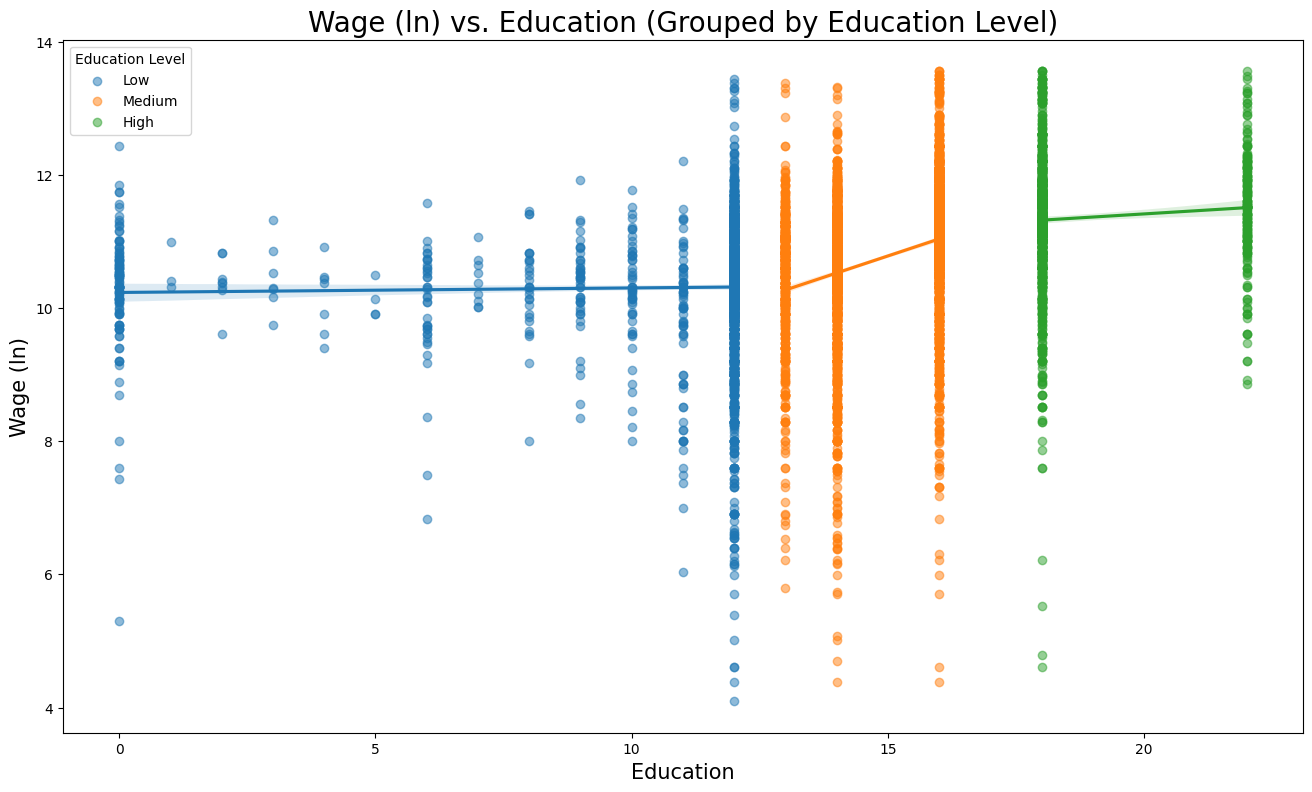

In [75]:
fig, ax = plt.subplots(figsize=(16, 9))

# Plot separate fit lines for each education status
sns.regplot(x='educdc', y='lnincwage', data=acs_df[acs_df['educdc'] <= 12], ax=ax, label='Low', scatter_kws={'alpha':0.5})
sns.regplot(x='educdc', y='lnincwage', data=acs_df[(acs_df['educdc'] > 12) & (acs_df['educdc'] <= 16)], ax=ax, label='Medium', scatter_kws={'alpha':0.5})
sns.regplot(x='educdc', y='lnincwage', data=acs_df[acs_df['educdc'] > 16], ax=ax, label='High', scatter_kws={'alpha':0.5})

# Adding informative labels
ax.set_xlabel("Education", fontsize=15)
ax.set_ylabel("Wage (ln)", fontsize=15)
ax.set_title('Wage (ln) vs. Education (Grouped by Education Level)', fontsize=20)
ax.legend(title="Education Level")

# Display the plot
plt.show()


### 5. The President asks you to determine a tool that can be used to predict wages for those considering a college degree so that future constituents can make informed decisions.

(a) Write down a differential intercept and/or differential slope model of log wages that will allow the returns to education to vary by degree acquired (use the three categories in the previous question).

lnincwage = β0 + β1(educdc) + β2(hsdip) + β3(coldip) + β4(hsint) +β5(colint) +β6(female) + β7(age) + β7(agesq) + β8(white) + β9(black) + β10(hispanic) + β11(married) + β12(nchild) + β13(vet) + ϵ

This model is the best possible way compared to the previous model due to two reasons: 
1) The coefficients to hsdip and coldip, which are indicator variables for high school and college diploma, indicate the different intercepts based on diploma attainment. 
2) The coefficients to the interaction terms hsint and colint help explain the different returns to education for individuals depending on their level of diploma attainment. 
This model is correctly modeling f(X) but not over-fitting ϵ, because there are only two interaction terms added (high school and college diploma) which are known to be good indicators of wage determinants in the real world. The model might cause over-fitting if more granular interaction terms were added, such as dividing into elementary, middle and high school school attainments on top of the current model.

(b) Estimate the model you proposed in the previous question and report your results.

In [80]:
diff_regression = smf.ols('lnincwage ~ educdc + hsdip + coldip + hsint + colint + female + age + agesq + white + black + hispanic + married + nchild + vet', data=acs_df).fit()
print(diff_regression.summary())

                            OLS Regression Results                            
Dep. Variable:              lnincwage   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.305
Method:                 Least Squares   F-statistic:                     292.5
Date:                Wed, 29 Jan 2025   Prob (F-statistic):               0.00
Time:                        23:33:56   Log-Likelihood:                -11192.
No. Observations:                8627   AIC:                         2.241e+04
Df Residuals:                    8613   BIC:                         2.251e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.1384      0.130     54.993      0.0

(c) Given your model estimates from the previous question, predict the wages of an 22 year old, female individual (who is neither white, black, nor Hispanic, is not married, has no children, and is not a veteran) with a high school diploma and an all else equal individual with a college diploma. Assume that it takes someone 12 years to graduate high school and 16 years to graduate college.

In [90]:
b_educ = diff_regression.params['educdc']
b_hsdip = diff_regression.params['hsdip']
b_coldip = diff_regression.params['coldip']
b_hsint = diff_regression.params['hsint']
b_colint = diff_regression.params['colint']

predicted_hsdip = diff_regression.params['Intercept'] + b_educ*12 + b_hsdip + b_hsint*12 + diff_regression.params['female'] + diff_regression.params['age']*22 + diff_regression.params['agesq']*(22**2)
# Converting to wage
wage_hsdip = np.exp(predicted_hsdip)
print(f"The predicted wage for the individual with a high school diploma is ${wage_hsdip:.2f}.")

predicted_coldip = diff_regression.params['Intercept'] + b_educ*16 + b_coldip+ b_colint*16 + diff_regression.params['female'] + diff_regression.params['age']*22 + diff_regression.params['agesq']*(22**2)
# Converting to wage
wage_coldip = np.exp(predicted_coldip)
print(f"The predicted wage for the individual with a college diploma is ${wage_coldip:.2f}.")

The predicted  wage for the individual with a high school diploma is $12756.30.
The predicted  wage for the individual with a college diploma is $23575.79.


(d) The President wants to know, given your results from the previous question, do individuals with college degrees have higher predicted wages than those without? By how much? Briefly explain.

In [202]:
print(f"Percentage difference in earnings: {((wage_coldip / wage_hsdip) - 1) * 100:.2f}\nAmount difference in earnings: ${(wage_coldip - wage_hsdip):.2f}")

Percentage difference in earnings: 84.82
Amount difference in earnings: $10819.49


According to the model, individuals with college degrees, all else equal, have a higher predicted wages than those without. This is a significant magnitude difference between the predicted wages of college degree holders and high school degree holders.

(e) The President gets excited by your results and is now considering legislation that will expand access to college education (for instance, by increasing student loan subsidies). Given the evidence provided by your model, would you advise the President to pursue this legislation?

While the results point to a strong evidence that expanding access to college education may be beneficial for individuals' future earnings, I would be cautious in advising the President to pursue this legislation, because the 84.84% increase in wage earnings is not solely contingent on college education. The coefficient for coldip, the indicator term for college diploma for instance, is not statistically significant at the 95% level. This suggests that there is no strong evidence that the college diploma itself directly affects wages. Furthermore, this model does not control for other factors that may affect wage, such as job industry, college majors, college ranking, or location. Other components of an individual may have higher change of directly affecting wage. 

(f) What fraction of the variation in log wages does the model explain? How does this compare to the model you estimated in Question 3?

In [89]:
print(f"The model explains {diff_regression.rsquared*100:.2f}% of the variation in log wages.")

The model explains 30.63% of the variation in log wages.


This result is slightly higher than the variation explained in the previous model, which was explaining 28.34% of the variation in log wages.

(g) The President is concerned that citizens will be harmed (and voters unhappy) if the predictions from your model turn out to be wrong. She wants to know how confident you are in your predictions. Briefly explain.

First, the model only explains 30.6% of wage differences, which means the rest 69.4% are left unexplained that may be affected by other factors not considered in this model, such as personality traits, IQ level, degree type, job industry, location, and many others. Second, the p-values of hsdip, coldip and hsint are all greater than 0.05, suggesting not enough evidence to reject the hypothesis that these elements do not have any effect on wages. Third, the model is trained on only a random 10,000 subset of national population, thus it may not reflect the full population or may produce different results when tested on new data. 

### 6. You remember that splines may be useful when generating predictions when you have non-linear relationships, such as with age. You hypothesize that there may be an increase in predictive power if we account for life milestones.

(a) Estimate a model, keeping the other predictors, with a cubic spline in age and two knots: one at age 18 and another at age 65. Report the adjusted R2.

In [167]:
X_age = acs_df[["age"]].dropna()
y = acs_df.loc[X_age.index, "lnincwage"]

#knots must be in the correct array dimension for SplineTransformer (Could also be done by .T on the array and coersing as 2d array)
knots = np.array([18, 65]).reshape(-1, 1)

#spline degree is the power of the relationship in the trunkated basis function ,i.e. degree = 1 linear, = 2 quadratic, = 3 cubic 
spline_transformer = SplineTransformer(degree=3, knots=knots, include_bias=False)

# Transform AGE into spline basis functions
X_splines = spline_transformer.fit_transform(X_age)

# Other predictors
all_predictors = ["educdc", "hsdip", "coldip", "hsint", "colint", "female", "white", "black", "hispanic", "married", "nchild", "vet"]
X_other = acs_df.loc[X_age.index, all_predictors]
X_other = X_other.to_numpy()
X_final = np.hstack([X_splines, X_other])

model = LinearRegression()
model.fit(X_final, y)

# Print intercept and coefficients
print("Intercept:", model.intercept_)

# Combine coefficient names for output
spline_columns = [f"spline_{i}" for i in range(X_splines.shape[1])]
all_columns = spline_columns + all_predictors
coefficients = pd.Series(model.coef_, index=all_columns)
print("Coefficients:")
print(coefficients)

# Calculate R^2
r_squared = model.score(X_final, y)

n = len(y)  
p = X_final.shape[1]  # dfs used (spline features)
adjusted_r_squared = 1 - ((1 - r_squared) * (n - 1)) / (n - p - 1)
print("Adjusted R-squared:", adjusted_r_squared)

Intercept: 13.498395106906806
Coefficients:
spline_0   -18.800324
spline_1    -0.969943
spline_2    -4.504516
educdc       0.026641
hsdip       -0.000186
coldip      -0.150363
hsint       -0.002237
colint       0.037595
female      -0.384086
white        0.046614
black       -0.106774
hispanic    -0.087784
married      0.186135
nchild      -0.022609
vet          0.063277
dtype: float64
Adjusted R-squared: 0.3125348259285713


(b) Compare this adjusted R2 to the analog from the regression in Question 3. Why are these different? Briefly explain.

The previous R2 is 0.283. The adjusted R2 of the non-linear spline model is 0.313, which suggests that it captures more of the variance in the lnincwage that can be explained by the independent variables. This suggests that the non-linear model is better at capturing the relationship between wage and its predictors. 

(c) We used theory to motivate where we placed our knots. (Not very machine learning of us.) To practice tuning model parameters (that are determined prior to fitting and affect model flexibility), experiment by estimating two models one with knots at 24 and 55, and another of your own choosing. Report the adjusted R2 for each. Explain which model you prefer and why.

In [163]:
# [24, 55]
knots2 = np.array([24, 55]).reshape(-1, 1)

#spline degree is the power of the relationship in the trunkated basis function ,i.e. degree = 1 linear, = 2 quadratic, = 3 cubic 
spline_transformer1 = SplineTransformer(degree=3, knots=knots2, include_bias=False)

# Transform AGE into spline basis functions
X_splines2 = spline_transformer1.fit_transform(X_age)

X_final2 = np.hstack([X_splines2, X_other])
model2 = LinearRegression()
model2.fit(X_final2, y)

# Calculate R^2
r_squared2 = model2.score(X_final2, y)

n2 = len(y)  
p2 = X_final2.shape[1]  # dfs used (spline features)
adjusted_r_squared2 = 1 - ((1 - r_squared2) * (n2 - 1)) / (n2 - p2 - 1)
print("Adjusted R-squared for [24, 55]:", adjusted_r_squared2)

Adjusted R-squared for [24, 55]: 0.2939060871861955


In [164]:

# [15, 67]
knots3 = np.array([30, 52]).reshape(-1, 1)

#spline degree is the power of the relationship in the trunkated basis function ,i.e. degree = 1 linear, = 2 quadratic, = 3 cubic 
spline_transformer3 = SplineTransformer(degree=3, knots=knots3, include_bias=False)

# Transform AGE into spline basis functions
X_splines3 = spline_transformer3.fit_transform(X_age)

X_final3 = np.hstack([X_splines3, X_other])
model3 = LinearRegression()
model3.fit(X_final3, y)

# Calculate R^2
r_squared3 = model3.score(X_final3, y)

n3 = len(y)  
p3 = X_final3.shape[1]  # dfs used (spline features)
adjusted_r_squared3 = 1 - ((1 - r_squared3) * (n3 - 1)) / (n3 - p3 - 1)
print("Adjusted R-squared for [30, 52]:", adjusted_r_squared3)

Adjusted R-squared for [30, 52]: 0.2692667013937394


I prefer the original knot [18, 65] which captures the full range of the data, since it also captures the most amount of variance explained by the highest adjusted R-squared value. This makes sense since the nonlinear relationship would be better explained over a span of a wider range of age. 

(d) Splines use our data differently than traditional, more-linear regressions. Using the first model from Question 6c (with knots at 24 and 55), generate two predicted values for a female individual (who is neither white, black, nor Hispanic, is not married, has no children, and is not a veteran) with a college diploma: one prediction for the individual at age 17 and the other at age 50. Explain why these values are different.

In [169]:
spline_columns2 = [f"spline_{i}" for i in range(X_splines2.shape[1])]
all_columns2 = spline_columns2 + all_predictors
coefficients2 = pd.Series(model2.coef_, index=all_columns2)
print("Coefficients:")
print(coefficients2)

Coefficients:
spline_0   -11.823475
spline_1    -0.780660
spline_2    -3.016690
educdc       0.027468
hsdip       -0.000290
coldip      -0.049334
hsint       -0.003479
colint       0.033295
female      -0.390656
white        0.040804
black       -0.105892
hispanic    -0.081812
married      0.197992
nchild      -0.009780
vet          0.067863
dtype: float64


In [ ]:
age = [17, 50]
all_predictors = ["educdc", "hsdip", "coldip", "hsint", "colint", "female", "white", "black", "hispanic", "married", "nchild", "vet"]
# Assumption: the individual also has a high school degree based on the fact that they have a college diploma
characteristics = np.array([16, 1, 1, 16, 16, 1, 0, 0, 0, 0, 0, 0])

for n in age:
    age_n = np.array([[n]])
    age_n_df = pd.DataFrame(age_n, columns=["age"])
    age_n_spline = spline_transformer.transform(age_n_df)
    spline_coeffs_n = coefficients2[["spline_0", "spline_1", "spline_2"]].to_numpy()
    age_n_spline = np.dot(age_n_spline, spline_coeffs_n).item()
    
    coeffs_n = coefficients2[all_predictors].to_numpy()
    predictors_n = np.dot(characteristics, coeffs_n).item()
    predicted_n = age_n_spline + predictors_n 
    wage_n = np.exp(model2.intercept_ + predicted_n)
    print(f"Predicted wage for age {n}: ${wage_n:.2f}")

Predicted wage for age 17: $21401.36
Predicted wage for age 50: $52381.52


The values are different because it reflects on the higher wage that an individual earns at age 50 compared to the initial wage at age 17. Specifically, the estimates reflect that wage increase at a nonlinear (non-constant) rate. In this specific model, the knots are set at 24 and 55, which may have reflected the fact that before age 24, there is likely less training and years of experience, resulting in a lower wage. At age 50, wage is much higher due to the accumulated experience and higher job productivity. This reflects on the non-linear career and wage trajectory of an individual. 